In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re
import csv


## Read the Data

In [3]:
data = "train_data.csv"
df1 = pd.read_csv(data)

## Number of Transactions

In [4]:
print("Number of rows = " + str(len(df1.index)))
print("Number of fradulent transactions = " + str(len(df1.loc[df1['label'] == 1])))
print("Number of valid transactions = " + str(len(df1.loc[df1['label'] == 0])))

Number of rows = 189628
Number of fradulent transactions = 276
Number of valid transactions = 189352


## Sample Data

In [24]:
df1.head()

,Id,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label
0,1,GB,mccredit,546097.0,4500.0,GBP,GB,Ecommerce,True,1,UKAccount,email132571,ip123779,card250169,0
1,2,GB,mcdebit,557349.0,3395.0,GBP,GB,Ecommerce,True,1,UKAccount,email312302,ip298387,card14235,0
2,3,GB,mccredit,542011.0,3895.0,GBP,GB,Ecommerce,True,1,UKAccount,email255027,ip260053,card31944,0
3,4,GB,visadebit,465943.0,15345.0,GBP,GB,ContAuth,False,0,UKAccount,email283167,ip54851,card120871,0
4,6,GB,visadebit,475127.0,5095.0,GBP,GB,Ecommerce,True,1,UKAccount,email325263,ip203929,card208017,0


## Data Preprocessing

In [5]:
#Prepare card id and ip id for plotting

# 1.Card ID
card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

# 2.IP ID
ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)


## Fradulent transactions per card id

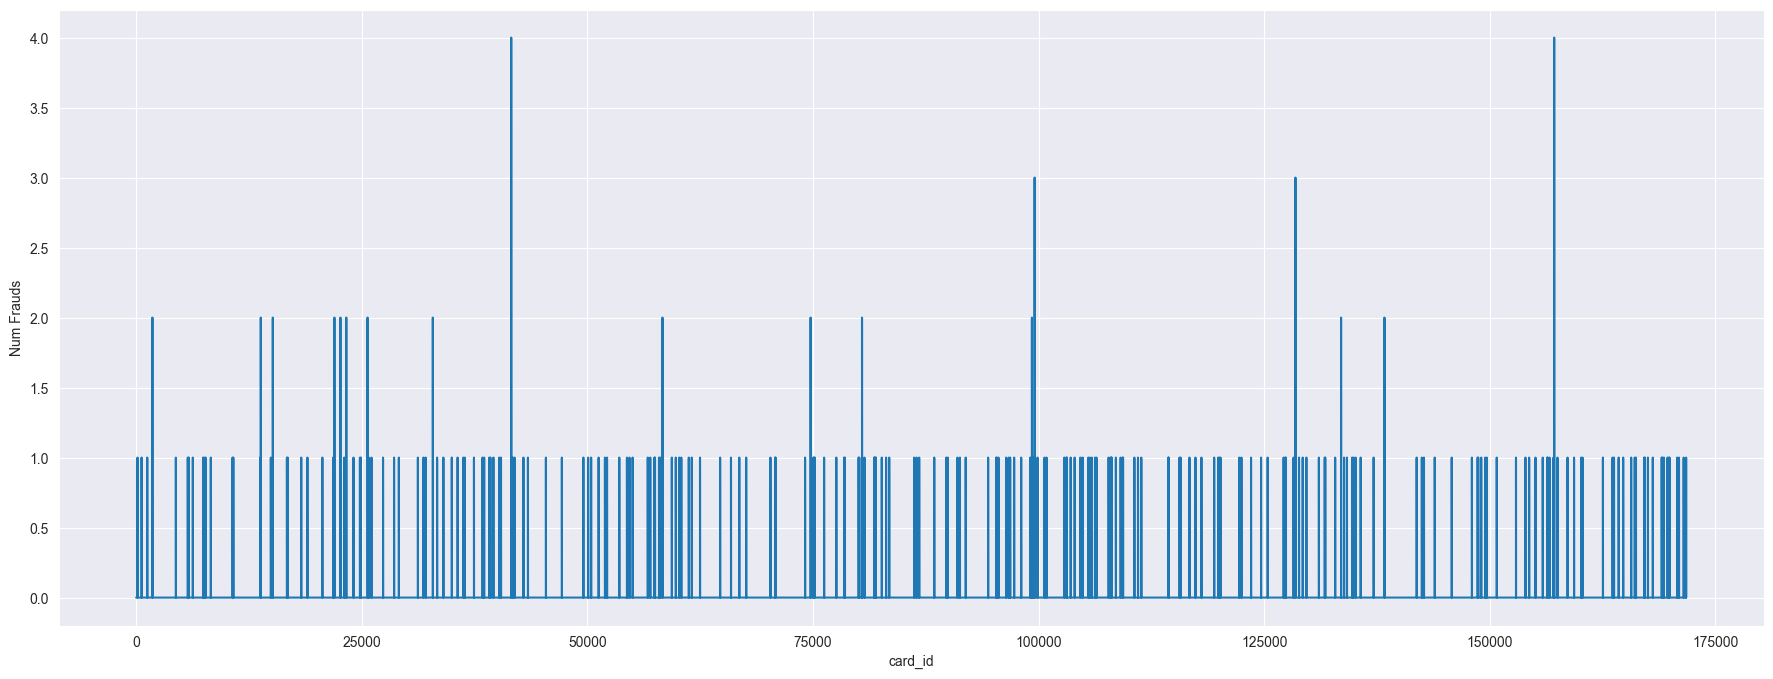

In [6]:
df2 = df1[['card_id','label']].groupby(['card_id']).sum()
len(df2.loc[df2['label'] > 0])
f, (ax) = plt.subplots(1,figsize =(22, 8))
ax = sns.lineplot(x=df2.index,y=df2['label'])
ax.set(ylabel = "Num Frauds")
plt.show()

## Fradulent transactions per IP

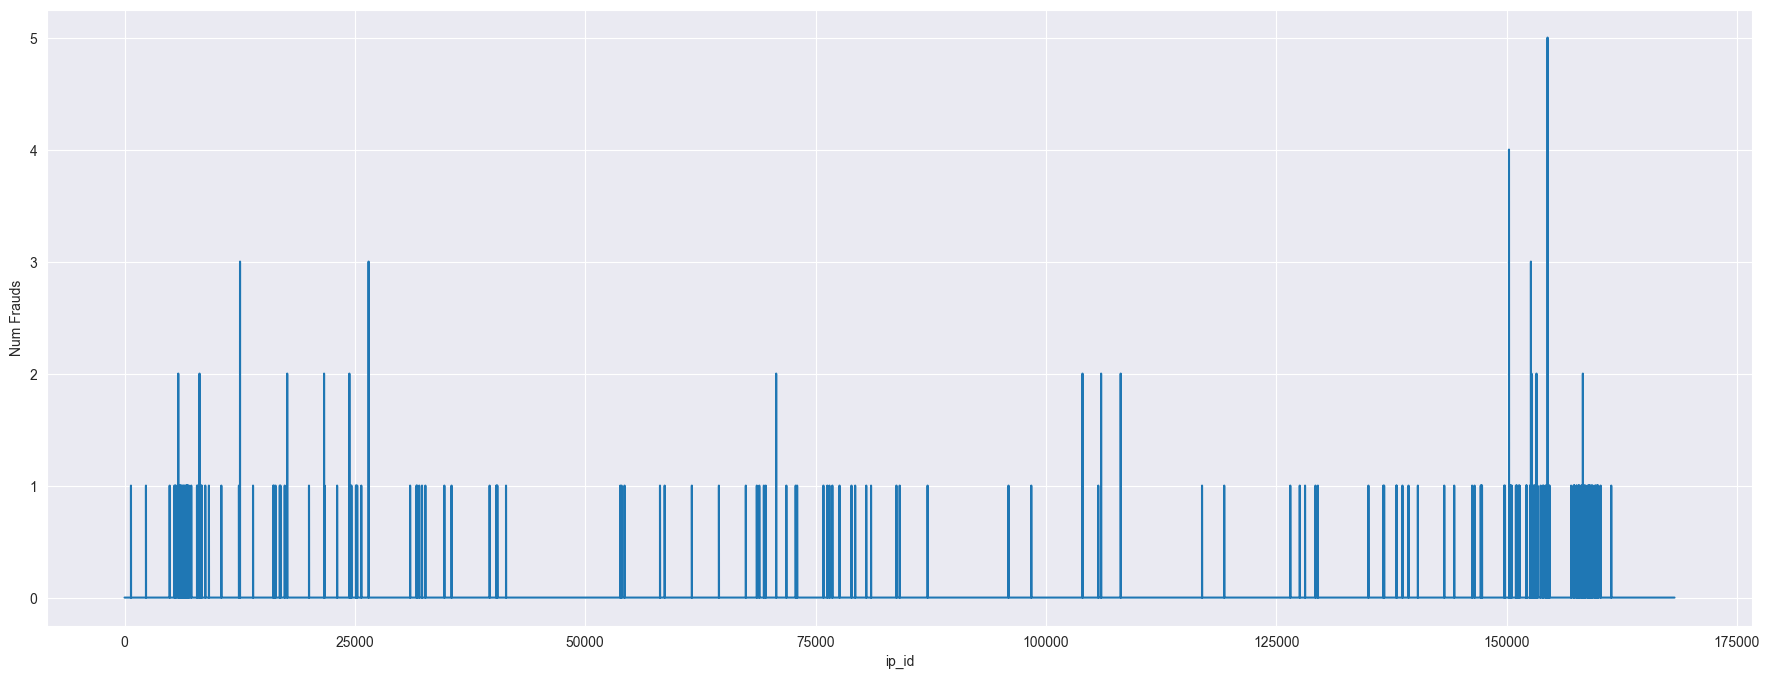

In [7]:
df3 = df1[['ip_id','label']].groupby(['ip_id']).sum()
len(df3.loc[df3['label'] > 0])
f, (ax) = plt.subplots(1,figsize =(22, 8))
ax = sns.lineplot(x=df3.index,y=df3['label'])
ax.set(ylabel = "Num Frauds")
plt.show()

## Data Preprocessing

In [8]:
data = "train_data.csv"
df1 = pd.read_csv(data)

#Prepare card id and ip id for plotting

# 1.Card ID
card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

# 2.IP ID
ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)

#Encoding, Cleaning the data
df1.loc[df1['cardverificationcodesupplied'].isna(),'cardverificationcodesupplied'] = False
df1.loc[df1['issuercountrycode'].isna(),'issuercountrycode'] = 'ZZ'
df1.loc[df1['shoppercountrycode'].isna(),'shoppercountrycode'] = 'ZZ'

unique_issuer_cc = df1['issuercountrycode'].unique()
unique_shopper_cc = df1['shoppercountrycode'].unique()
both = np.append(unique_issuer_cc, unique_shopper_cc)
df_countrycodes = pd.DataFrame(both)
unique_codes = df_countrycodes[0].unique()
enc = LabelEncoder()
enc.fit(unique_codes)
df1['issuercountrycode'] = enc.transform(df1.issuercountrycode)
df1['shoppercountrycode'] = enc.transform(df1.shoppercountrycode)
def conv(row):
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                     "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                     "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                     "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                     "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                     "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[row['currencycode']]*100)

df1['amount_eur'] = df1.apply(lambda x: conv(x), axis=1)


enc1 = LabelEncoder()
enc1.fit(df1['txvariantcode'])
df1['txvariantcode'] = enc1.transform(df1.txvariantcode)

enc2 = LabelEncoder()
enc2.fit(df1['currencycode'])
df1['currencycode'] = enc2.transform(df1.currencycode)

enc3 = LabelEncoder()
enc3.fit(df1['shopperinteraction'])
df1['shopperinteraction'] = enc3.transform(df1.shopperinteraction)

df1['accountcode'] = df1['accountcode'].apply(lambda x: re.sub('Account','',x))
df1['accountcode_cc'] = 0
df1.loc[(df1['accountcode'] == 'UK'),'accountcode_cc'] = 'GB'
df1.loc[(df1['accountcode'] == 'Mexico'),'accountcode_cc'] = 'MX'
df1.loc[(df1['accountcode'] == 'Sweden'),'accountcode_cc'] = 'SE'
df1.loc[(df1['accountcode'] == 'APAC'),'accountcode_cc'] = 'APAC'

enc4 = LabelEncoder()
enc4.fit(df1['accountcode'])
df1['accountcode'] = enc4.transform(df1.accountcode)

enc5 = LabelEncoder()
enc5.fit(df1['cardverificationcodesupplied'])
df1['cardverificationcodesupplied'] = enc5.transform(df1.cardverificationcodesupplied)

df1.loc[df1['mail_id'].str.contains('na',case=False),'mail_id'] = 'email99999'

enc6 = LabelEncoder()
enc6.fit(df1['mail_id'])
df1['mail_id'] = enc6.transform(df1.mail_id)

df1.loc[df1['cvcresponsecode'] > 2,'cvcresponsecode'] = 3

#Feature Engineering
df1['countries_equal'] = (df1['shoppercountrycode'] == df1['issuercountrycode'])
df1.loc[df1['countries_equal'] == False,'countries_equal'] = 0
df1.loc[df1['countries_equal'] == True,'countries_equal'] = 1


X = df1[['issuercountrycode','txvariantcode','bin','amount','currencycode','shoppercountrycode','shopperinteraction','cardverificationcodesupplied','cvcresponsecode','accountcode','mail_id','ip_id','card_id','amount_eur','countries_equal']]


## Heat Maps

C:\Users\ottev\AppData\Local\Temp\ipykernel_12312\1223240128.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(df1.query('label==1').drop('label',1).corr(), vmax = .8, square=True, ax = ax1)
C:\Users\ottev\AppData\Local\Temp\ipykernel_12312\1223240128.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.query('label==1').drop('label',1).corr(), vmax = .8, square=True, ax = ax1)
C:\Users\ottev\AppData\Local\Temp\ipykernel_12312\1223240128.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(df1.query('label==0').drop('label',1).corr(), vmax = .8, square=True, ax = ax2);
C:\Users\ottev\AppData\Local\Temp\i

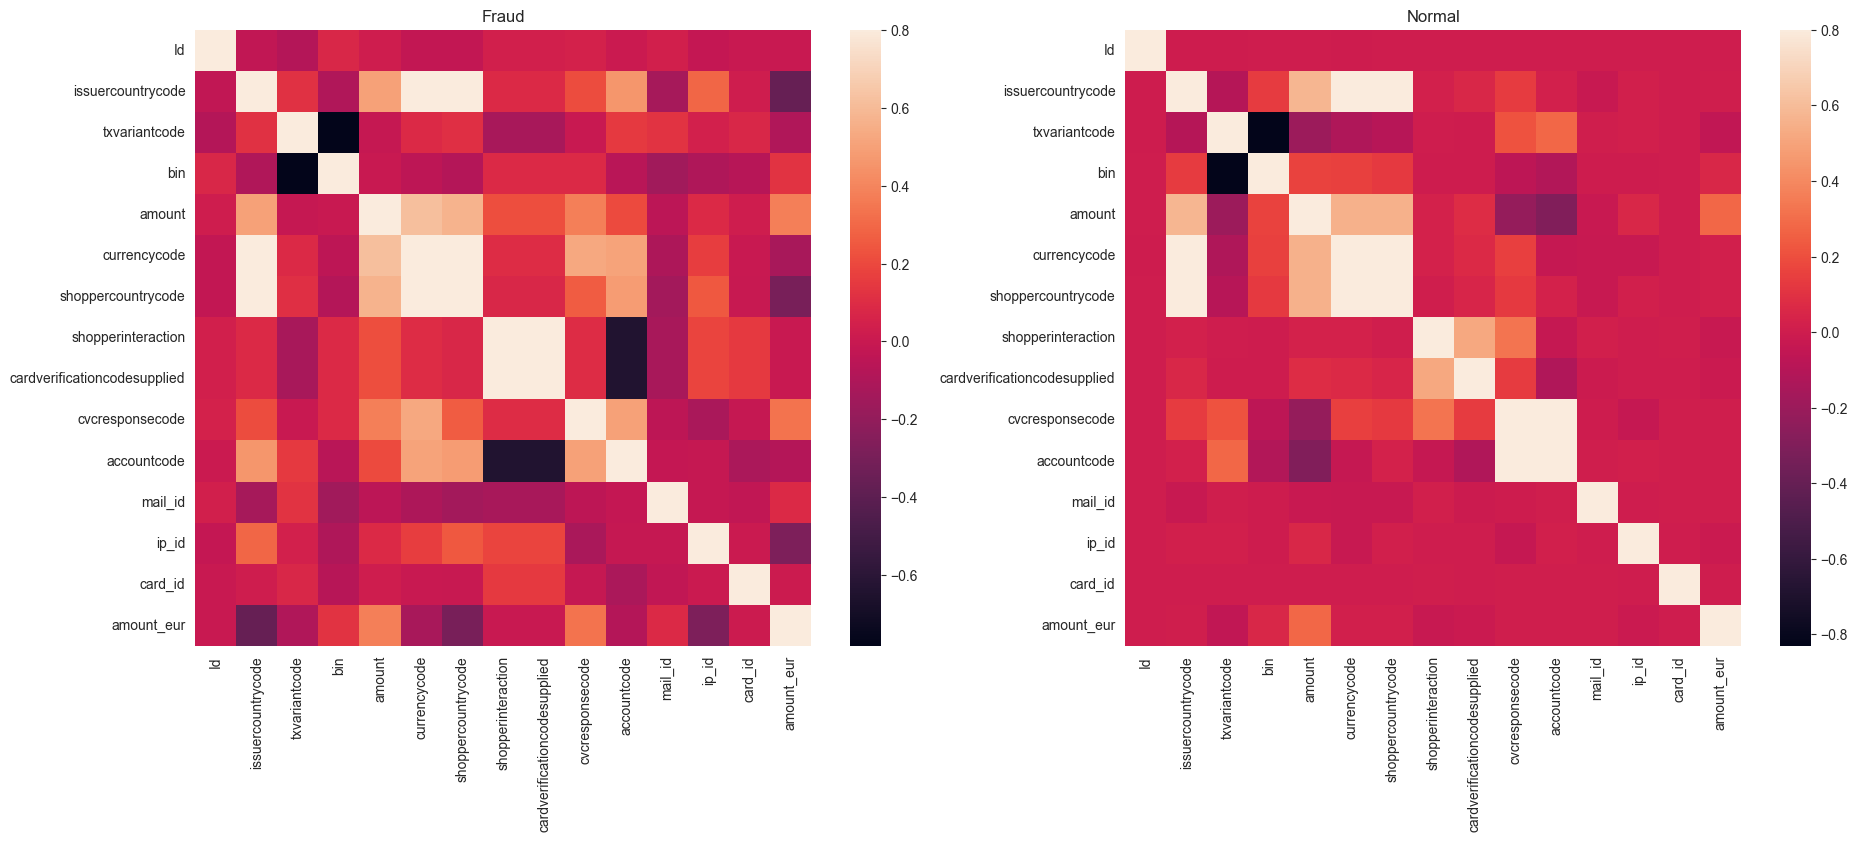

C:\Users\ottev\AppData\Local\Temp\ipykernel_12312\1223240128.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(abs(df1.query('label==0').drop('label',1).corr() - df1.query('label==1').drop('label',1).corr()))
C:\Users\ottev\AppData\Local\Temp\ipykernel_12312\1223240128.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df1.query('label==0').drop('label',1).corr() - df1.query('label==1').drop('label',1).corr()))
C:\Users\ottev\AppData\Local\Temp\ipykernel_12312\1223240128.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(abs(df1.query('label==0').drop('label',1).corr() - df1.query('label==1').drop

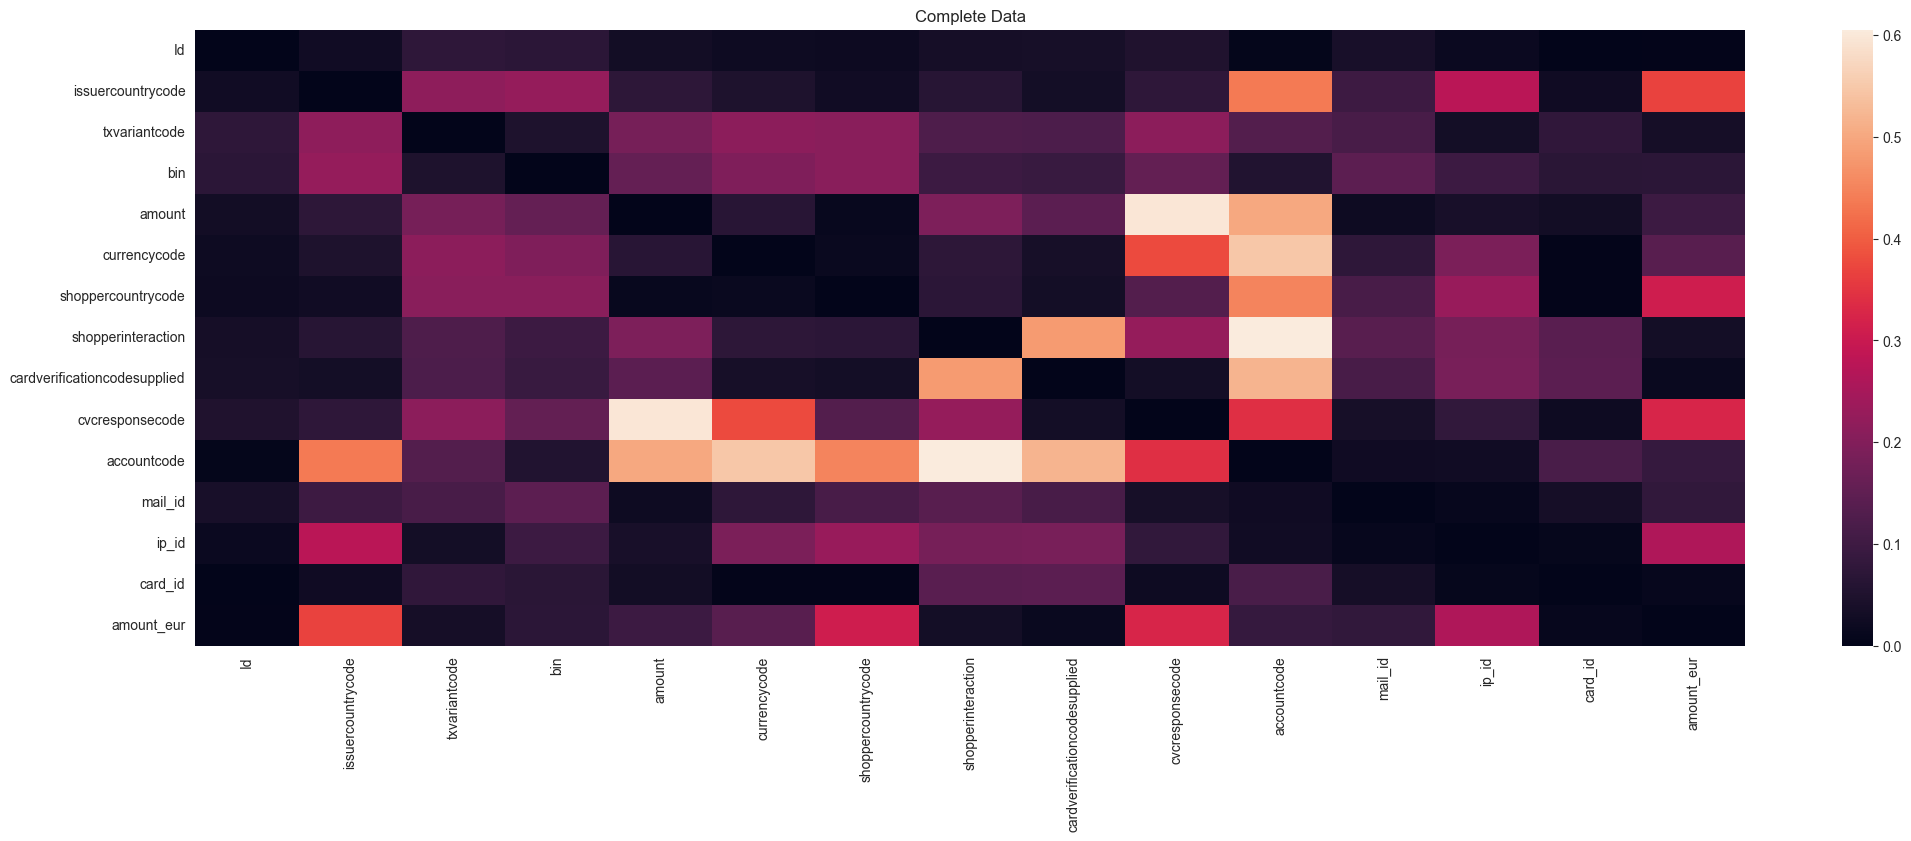

In [51]:
#correlation matrices
f, (ax1, ax2) = plt.subplots(1,2,figsize =(22, 8))

sns.heatmap(df1.query('label==1').drop('label',1).corr(), vmax = .8, square=True, ax = ax1)
ax1.set_title('Fraud')

sns.heatmap(df1.query('label==0').drop('label',1).corr(), vmax = .8, square=True, ax = ax2);
ax2.set_title('Normal')

plt.show()

f, (ax1) = plt.subplots(1,figsize =(25, 8))
sns.heatmap(abs(df1.query('label==0').drop('label',1).corr() - df1.query('label==1').drop('label',1).corr()))
ax1.set_title('Complete Data')
plt.show()


In [52]:
print(df1.head())

   Id  issuercountrycode  txvariantcode       bin   amount  currencycode  \
0   1                 49              2  546097.0   4500.0             1   
1   2                 49              3  557349.0   3395.0             1   
2   3                 49              2  542011.0   3895.0             1   
3   4                 49              8  465943.0  15345.0             1   
4   6                 49              8  475127.0   5095.0             1   

   shoppercountrycode  shopperinteraction  cardverificationcodesupplied  \
0                  49                   1                             1   
1                  49                   1                             1   
2                  49                   1                             1   
3                  49                   0                             0   
4                  49                   1                             1   

   cvcresponsecode  accountcode  mail_id   ip_id  card_id  label  amount_eur  \
0           

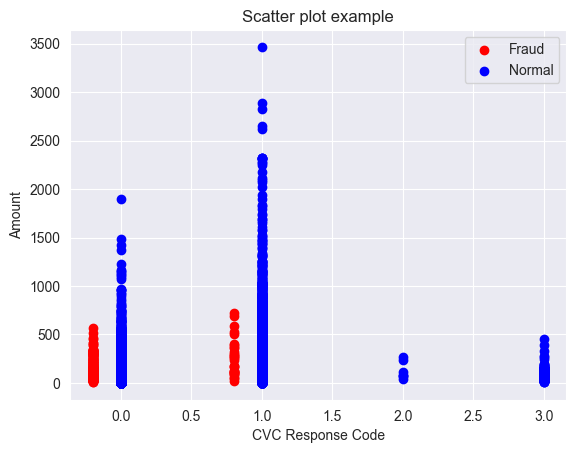

In [53]:
cvc_response_code = []
amount = []

cvc_response_code_fraud = []
amount_fraud = []

for row in df1.values:
    if row[14] == 1:
        cvc_response_code_fraud.append(row[9] - 0.2)
        amount_fraud.append(row[4])
    else:
        cvc_response_code.append(row[9])
        amount.append(row[4])

# Create a scatter plot with different markers/colors for the two groups
plt.scatter(cvc_response_code_fraud, amount_fraud, color='red', label='Fraud')
plt.scatter(cvc_response_code, amount, color='blue', label='Normal')

# Add axis labels and a title
plt.xlabel('CVC Response Code')
plt.ylabel('Amount')
plt.title('Scatter plot example')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [50]:
fraud_per_account = {}

for row in df1.query('label==1').values:
    if not row[11] in fraud_per_account:
        fraud_per_account[row[11]] = 0
    fraud_per_account[row[11]] += 1

print(fraud_per_account)

{131337: 1, 27797: 1, 112493: 1, 127811: 1, 94589: 4, 64137: 1, 25657: 1, 49730: 1, 9813: 1, 160018: 2, 134313: 1, 4412: 1, 35152: 1, 4405: 2, 60345: 3, 15803: 1, 144310: 1, 50859: 1, 126320: 2, 143376: 1, 164575: 1, 128505: 1, 148846: 1, 56830: 1, 139003: 1, 120048: 1, 3132: 1, 166230: 1, 8405: 1, 19553: 5, 165171: 1, 137244: 1, 74800: 1, 92368: 1, 57676: 1, 92847: 1, 103141: 1, 163318: 1, 135417: 1, 162500: 1, 83828: 1, 45366: 1, 69962: 1, 83421: 1, 155300: 1, 139935: 1, 166192: 1, 129375: 1, 5846: 1, 34714: 1, 145068: 1, 5745: 2, 128337: 1, 103117: 3, 56719: 1, 132389: 1, 93049: 1, 20145: 1, 25556: 1, 97394: 1, 141239: 2, 152563: 1, 162505: 1, 162506: 1, 151676: 1, 133819: 1, 85813: 1, 86998: 1, 26575: 1, 64138: 1, 145983: 3, 111354: 1, 96122: 1, 30746: 1, 164574: 1, 17770: 1, 119528: 1, 77415: 1, 137790: 1, 165991: 1, 166232: 1, 72577: 1, 125995: 1, 123695: 1, 2976: 1, 128894: 1, 129347: 1, 166410: 4, 11515: 1, 111183: 1, 9887: 1, 2952: 1, 156386: 1, 124597: 1, 10565: 1, 50342: 1, 

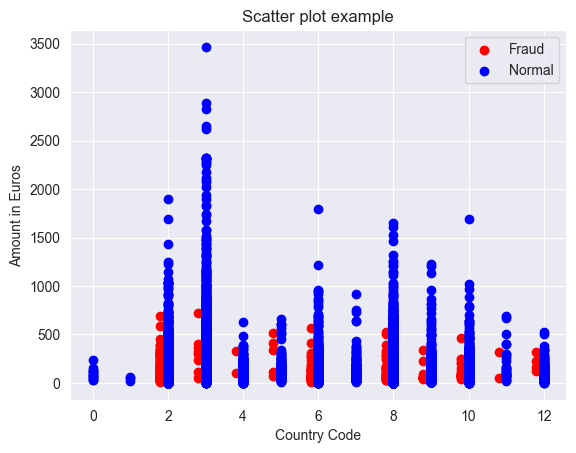

In [56]:
country_code = []
amount_eur = []

country_code_fraud = []
amount_eur_fraud = []

for row in df1.values:
    if row[14] == 1:
        country_code_fraud.append(row[2] - 0.2)
        amount_eur_fraud.append(row[15])
    else:
        country_code.append(row[2])
        amount_eur.append(row[15])

# Create a scatter plot with different markers/colors for the two groups
plt.scatter(country_code_fraud, amount_eur_fraud, color='red', label='Fraud')
plt.scatter(country_code, amount_eur, color='blue', label='Normal')

# Add axis labels and a title
plt.xlabel('Country Code')
plt.ylabel('Amount in Euros')
plt.title('Scatter plot example')

# Add a legend
plt.legend()

# Show the plot
plt.show()